In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'../DATA/news-popularity/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
print(df.shape)

(39644, 61)


In [4]:
df.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [6]:
df.drop(['url',' timedelta'],inplace=True,axis=1)

In [7]:
df.loc[(df[' data_channel_is_lifestyle']==1),'category']=1
df.loc[(df[' data_channel_is_entertainment']==1),'category']=2
df.loc[(df[' data_channel_is_bus']==1),'category']=3
df.loc[(df[' data_channel_is_socmed']==1),'category']=4
df.loc[(df[' data_channel_is_tech']==1),'category']=5
df.loc[(df[' data_channel_is_world']==1),'category']=6
df['category'].fillna(0,inplace=True)
df.drop([' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world'],inplace=True,axis=1)

In [8]:
df.loc[(df[' weekday_is_saturday']==1),'day_of_week']=1
df.loc[(df[' weekday_is_sunday']==1),'day_of_week']=2
df.loc[(df[' weekday_is_monday']==1),'day_of_week']=3
df.loc[(df[' weekday_is_tuesday']==1),'day_of_week']=4
df.loc[(df[' weekday_is_wednesday']==1),'day_of_week']=5
df.loc[(df[' weekday_is_thursday']==1),'day_of_week']=6
df.loc[(df[' weekday_is_friday']==1),'day_of_week']=7
df.drop([' weekday_is_saturday',' weekday_is_sunday',' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday'],inplace=True,axis=1)

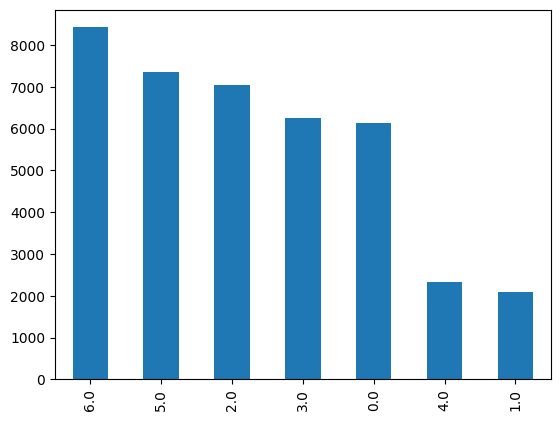

In [9]:
df['category'].value_counts().plot(kind='bar')
plt.show()

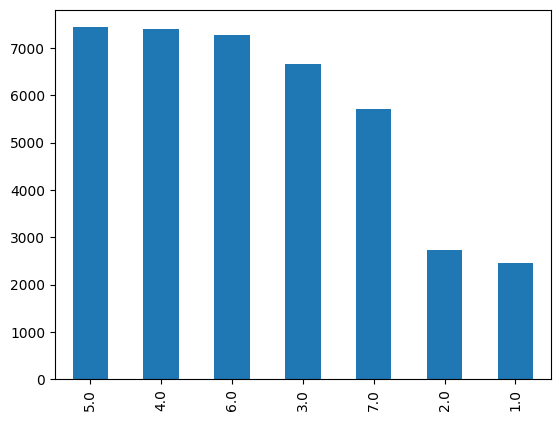

In [10]:
df['day_of_week'].value_counts().plot(kind='bar')
plt.show()

In [11]:
print(df.shape)

(39644, 48)


<AxesSubplot: >

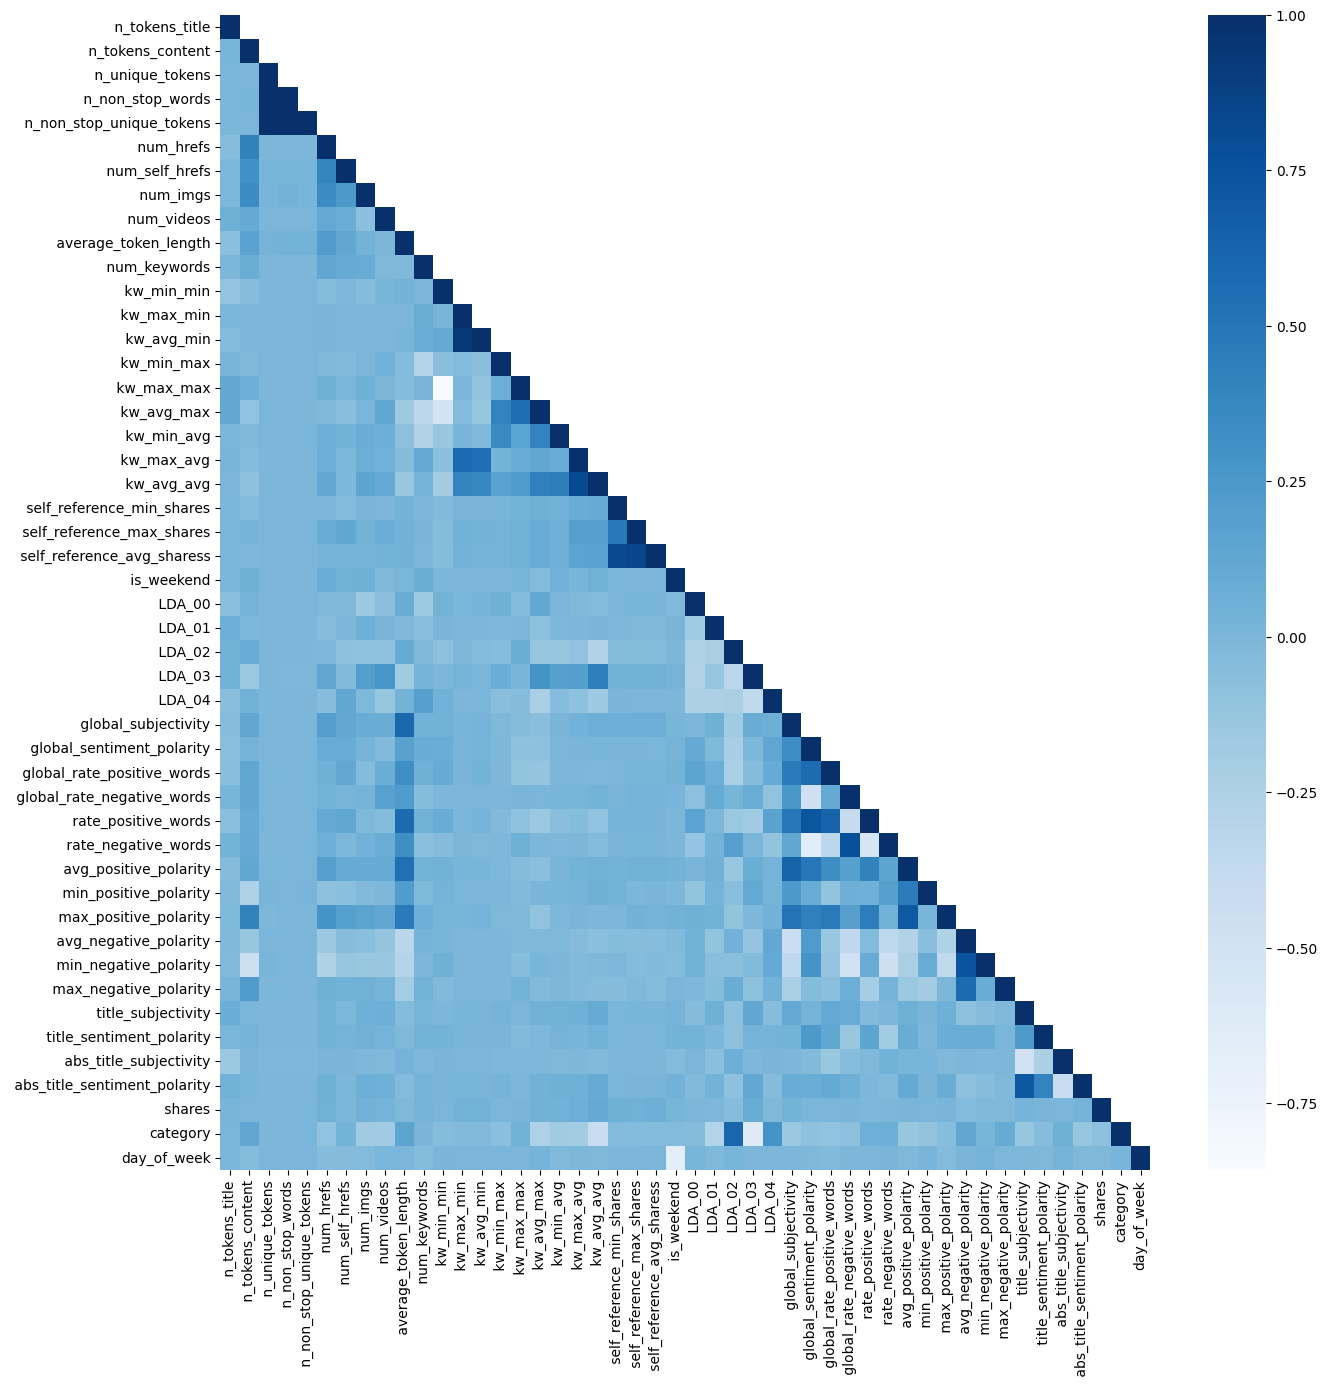

In [12]:
cor=df.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

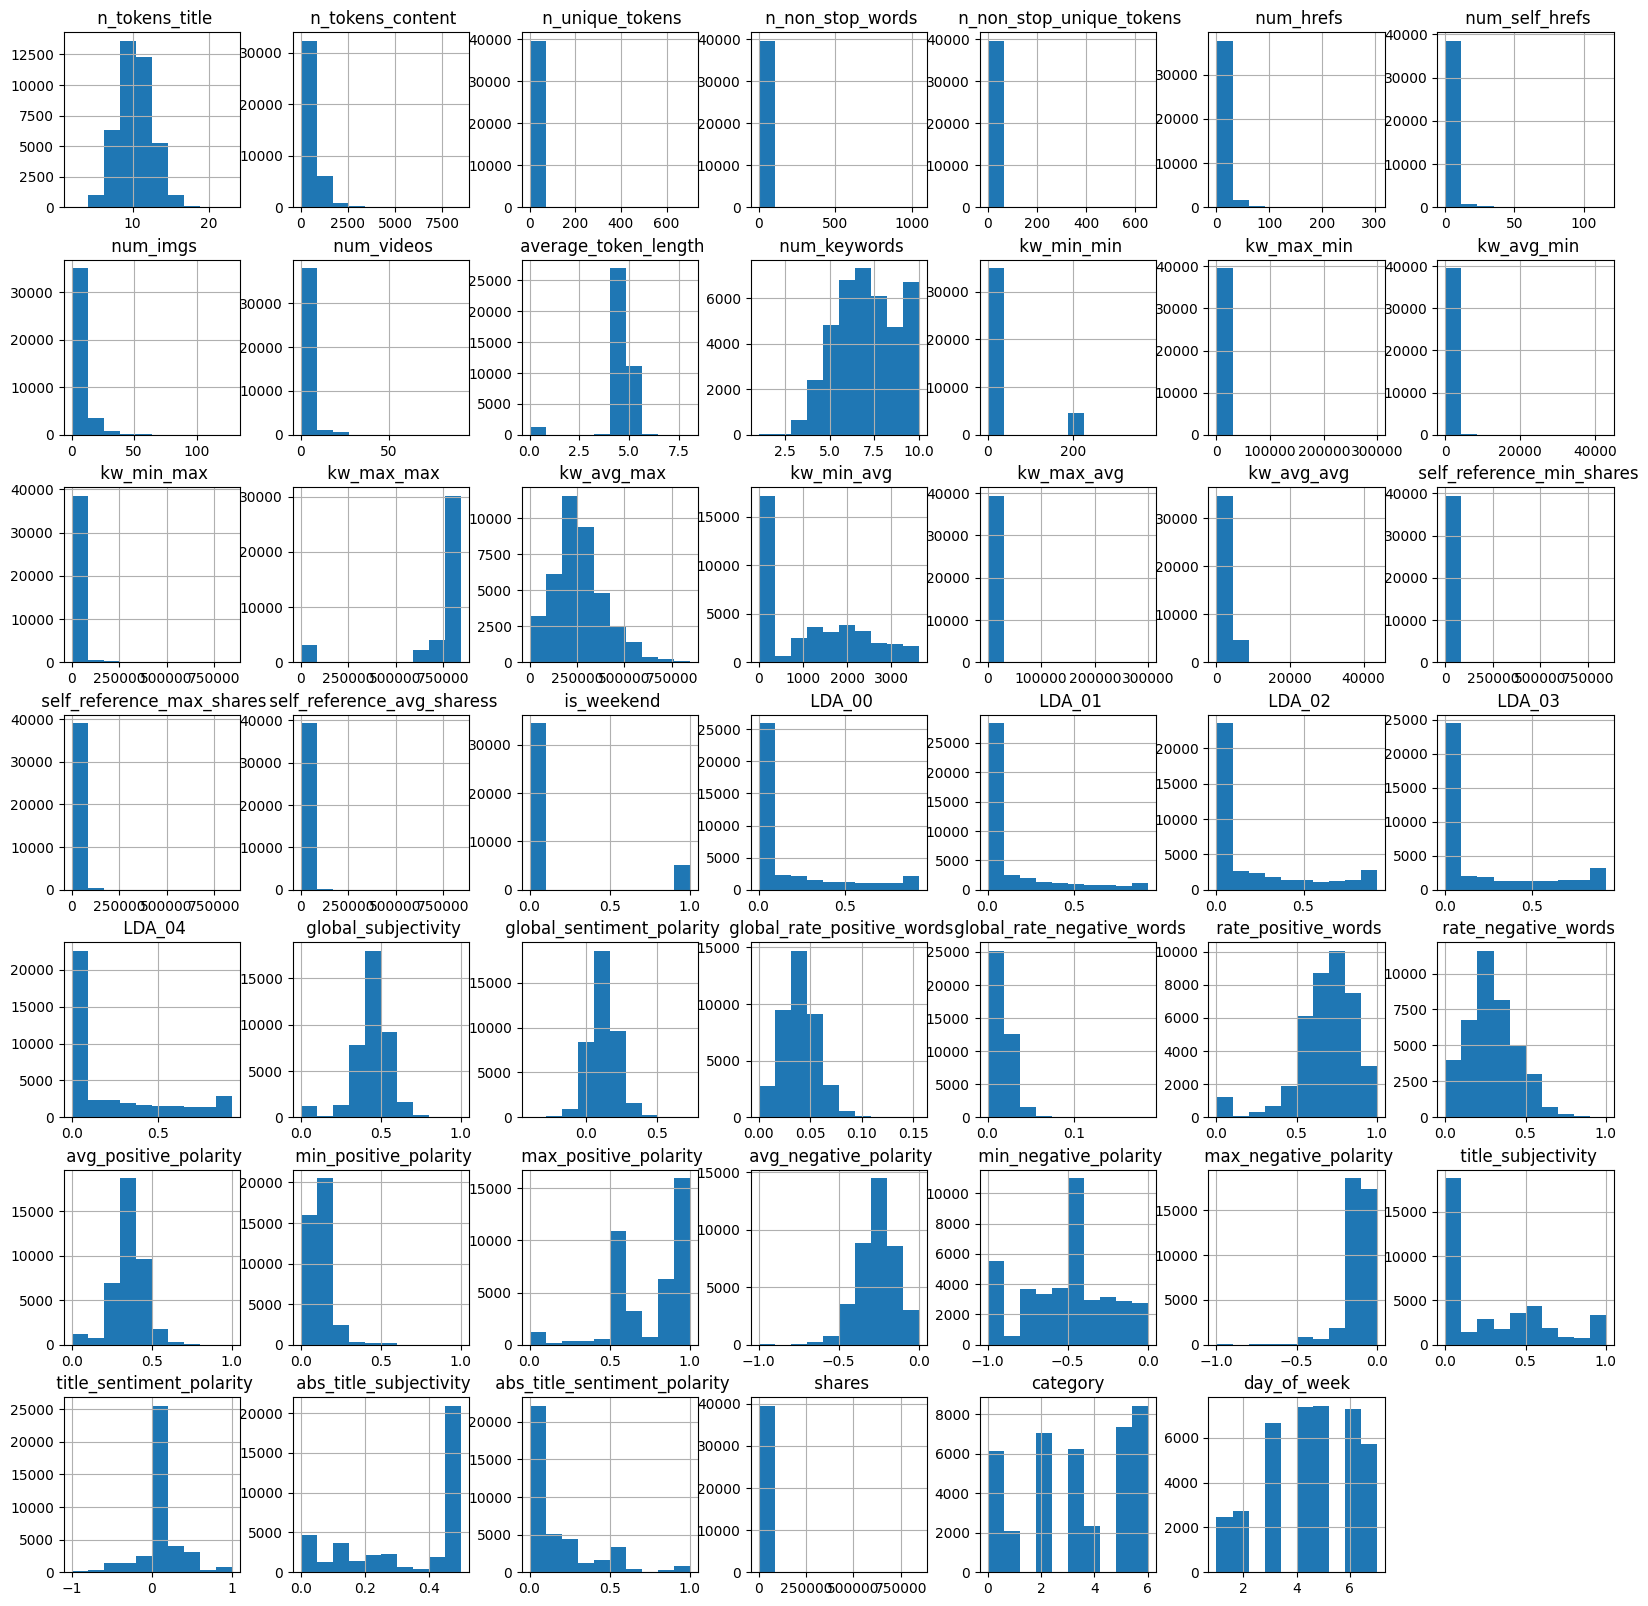

In [14]:
df.hist(figsize=(20,20))
plt.show()

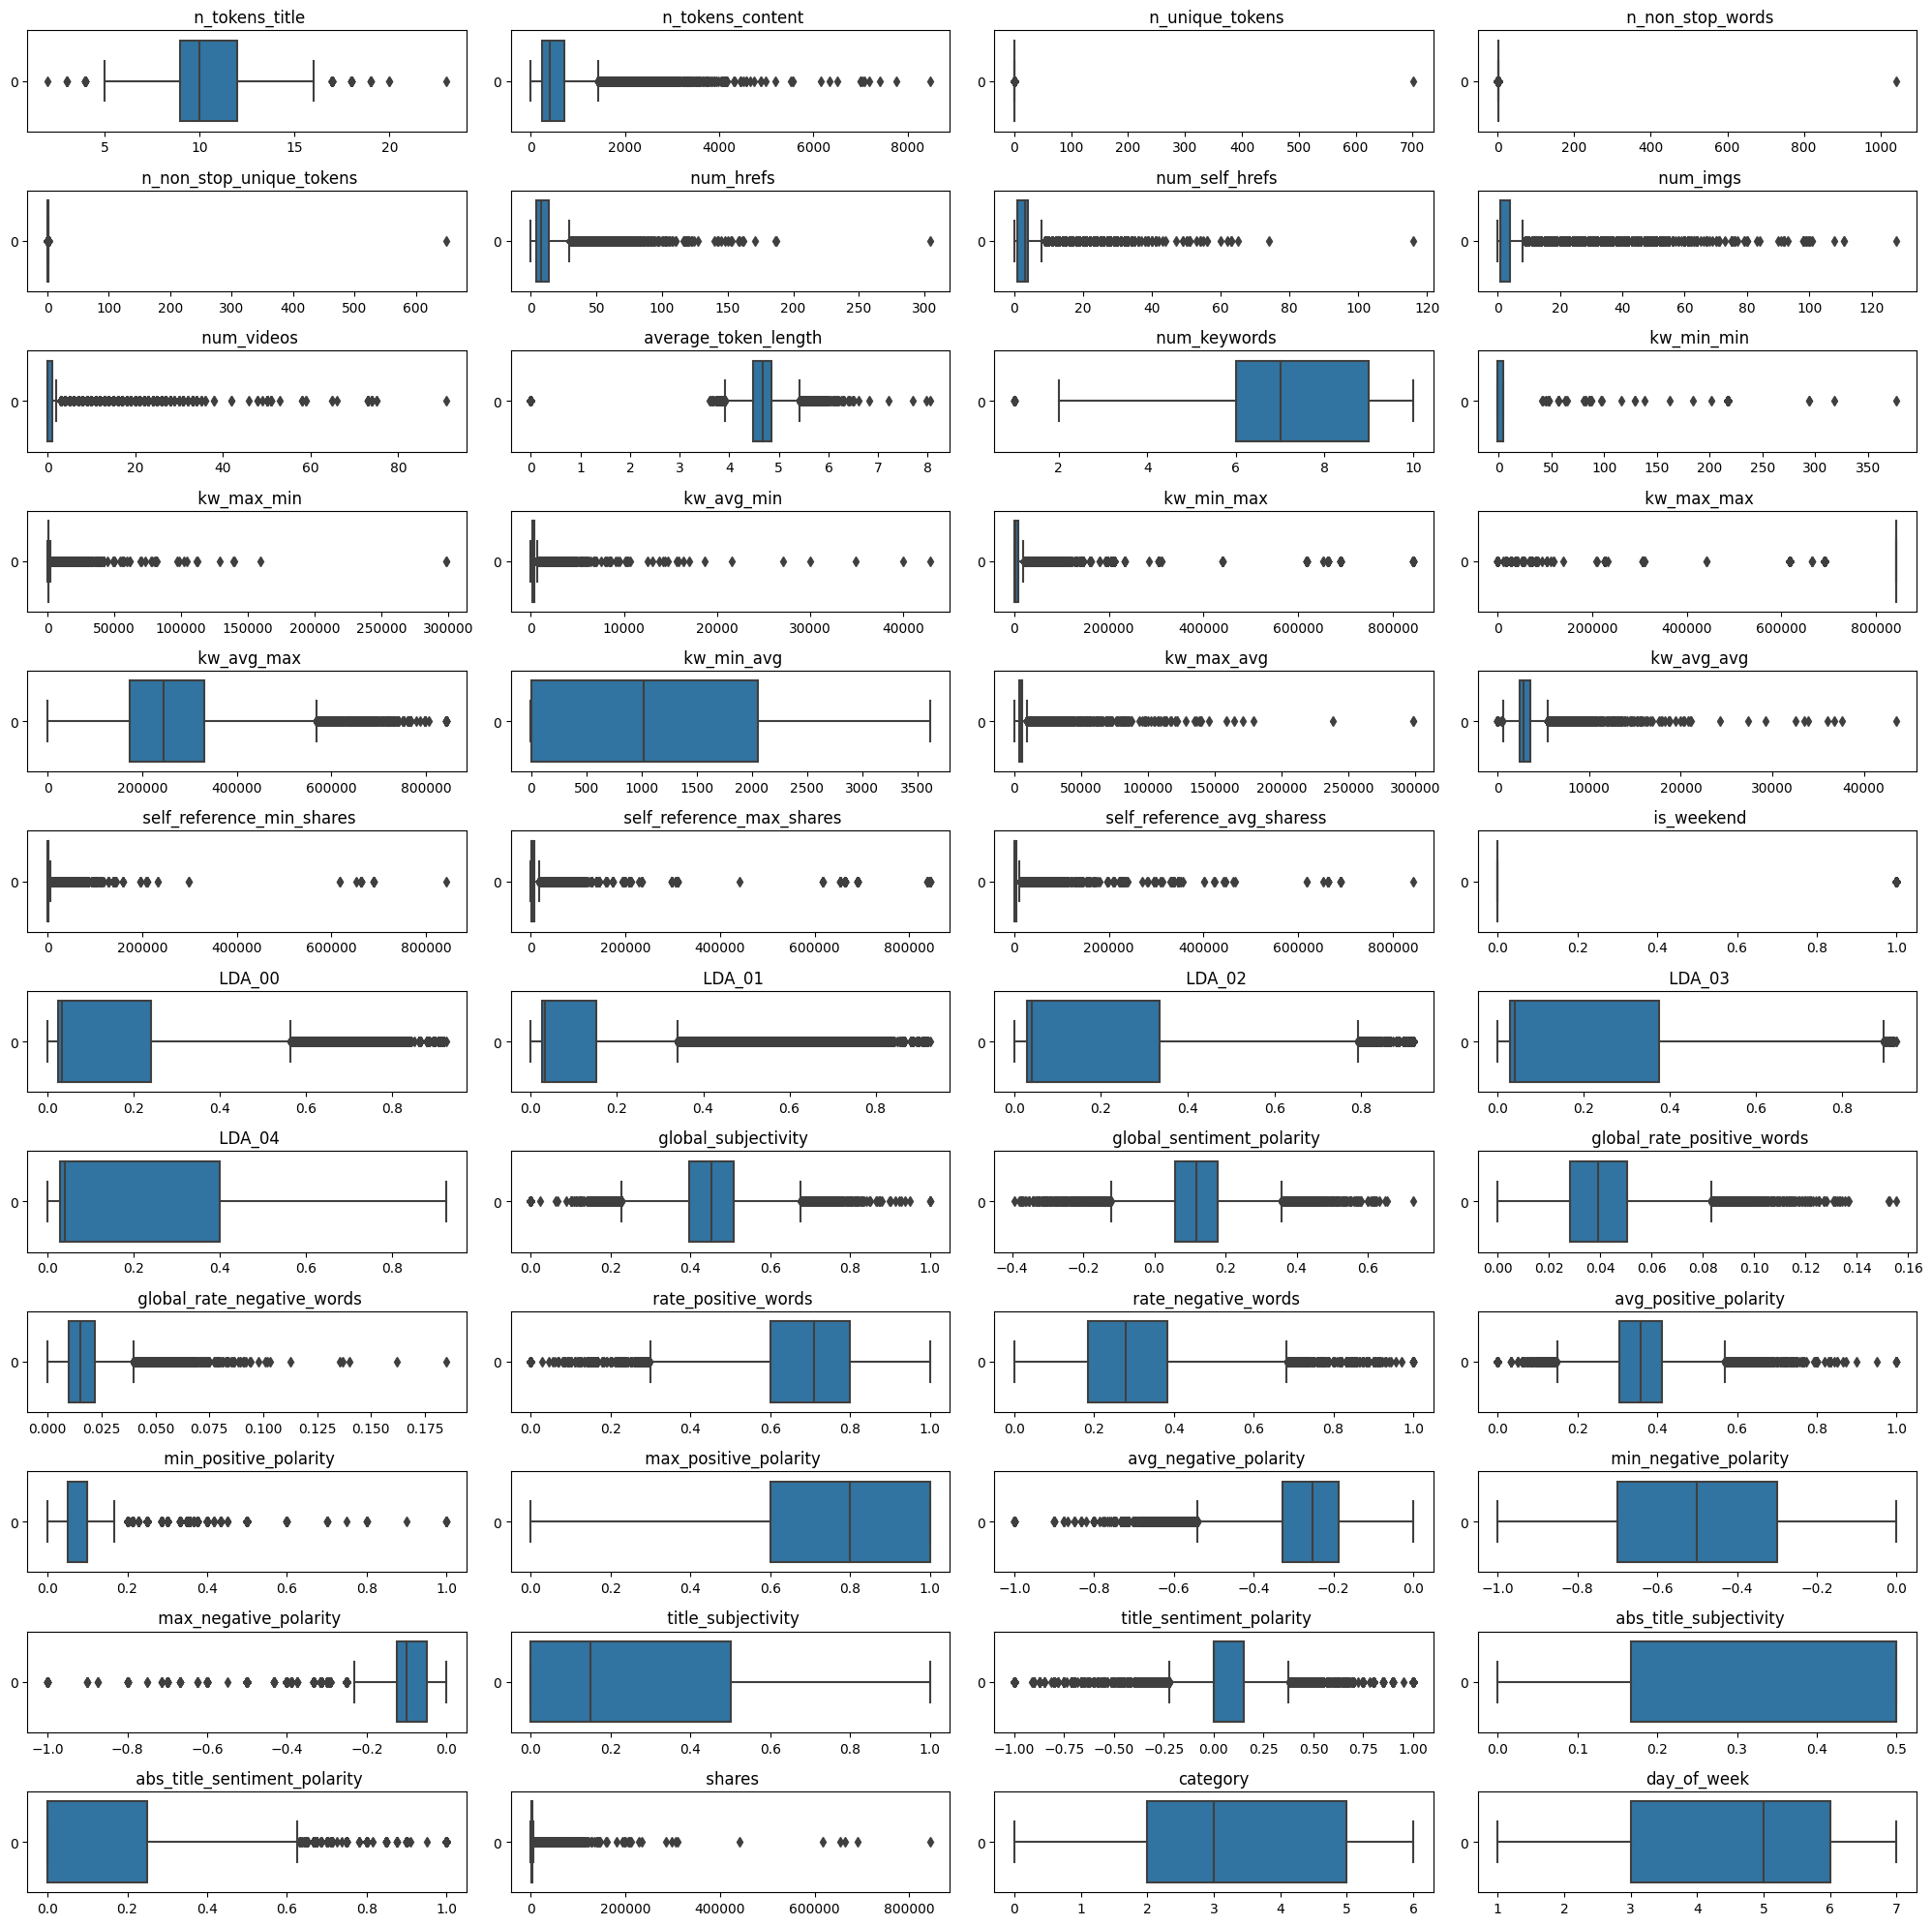

In [22]:
num_cols = df.select_dtypes(['int64', 'float64']).columns

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(12, 4, figsize=(20, 20))

# Plot each numeric column
for i, col in enumerate(num_cols):
    row, col_num = divmod(i, 4)
    sns.boxplot(df[col], ax=axes[row, col_num],orient='h')
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

In [44]:
# df['num_media'] = df[' num_imgs'] + df[' num_videos']

In [45]:
print(df[' shares'].corr(df[' num_imgs']))
print(df[' shares'].corr(df[' num_videos']))
print(df[' shares'].corr(df[' num_hrefs']))

print(df[' shares'].corr(df['num_media']))

0.039387597847628644
0.023936069530130995
0.04540400840592801
0.04719612756056311


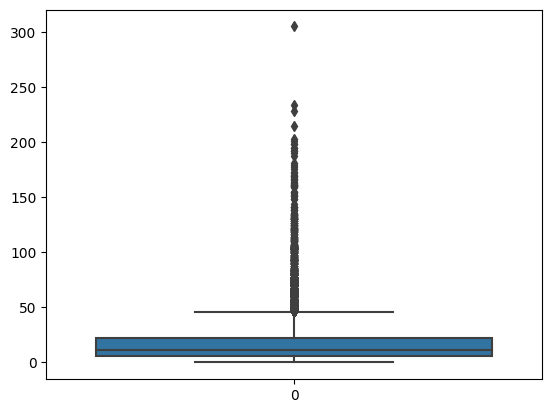

In [20]:
sns.boxplot(df['num_media'])
plt.show()

In [109]:
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_t

In [13]:
# data = df[df[' n_tokens_content']<2000]
# data = data[data[' n_unique_tokens']<100]
# data = data[data[' num_hrefs']<50]
# data = data[data[' num_imgs']<40]
# data = data[data[' kw_max_min']<7500]
# data = data[data[' kw_min_min']<50]
# data = data[data[' kw_avg_avg']<10000]
# data = data[data[' kw_min_max']<10000]
# data = data[data[' kw_avg_min']<1000]
# data = data[data[' self_reference_avg_sharess']<20000]

data = df[df[' shares']<5000]



In [14]:
df.shape

(39644, 48)

In [15]:
data.shape

(34464, 48)

In [16]:
df.drop([' n_unique_tokens',' n_non_stop_words', ' n_non_stop_unique_tokens',' num_self_hrefs',' average_token_length',' is_weekend'],axis=1,inplace=True)

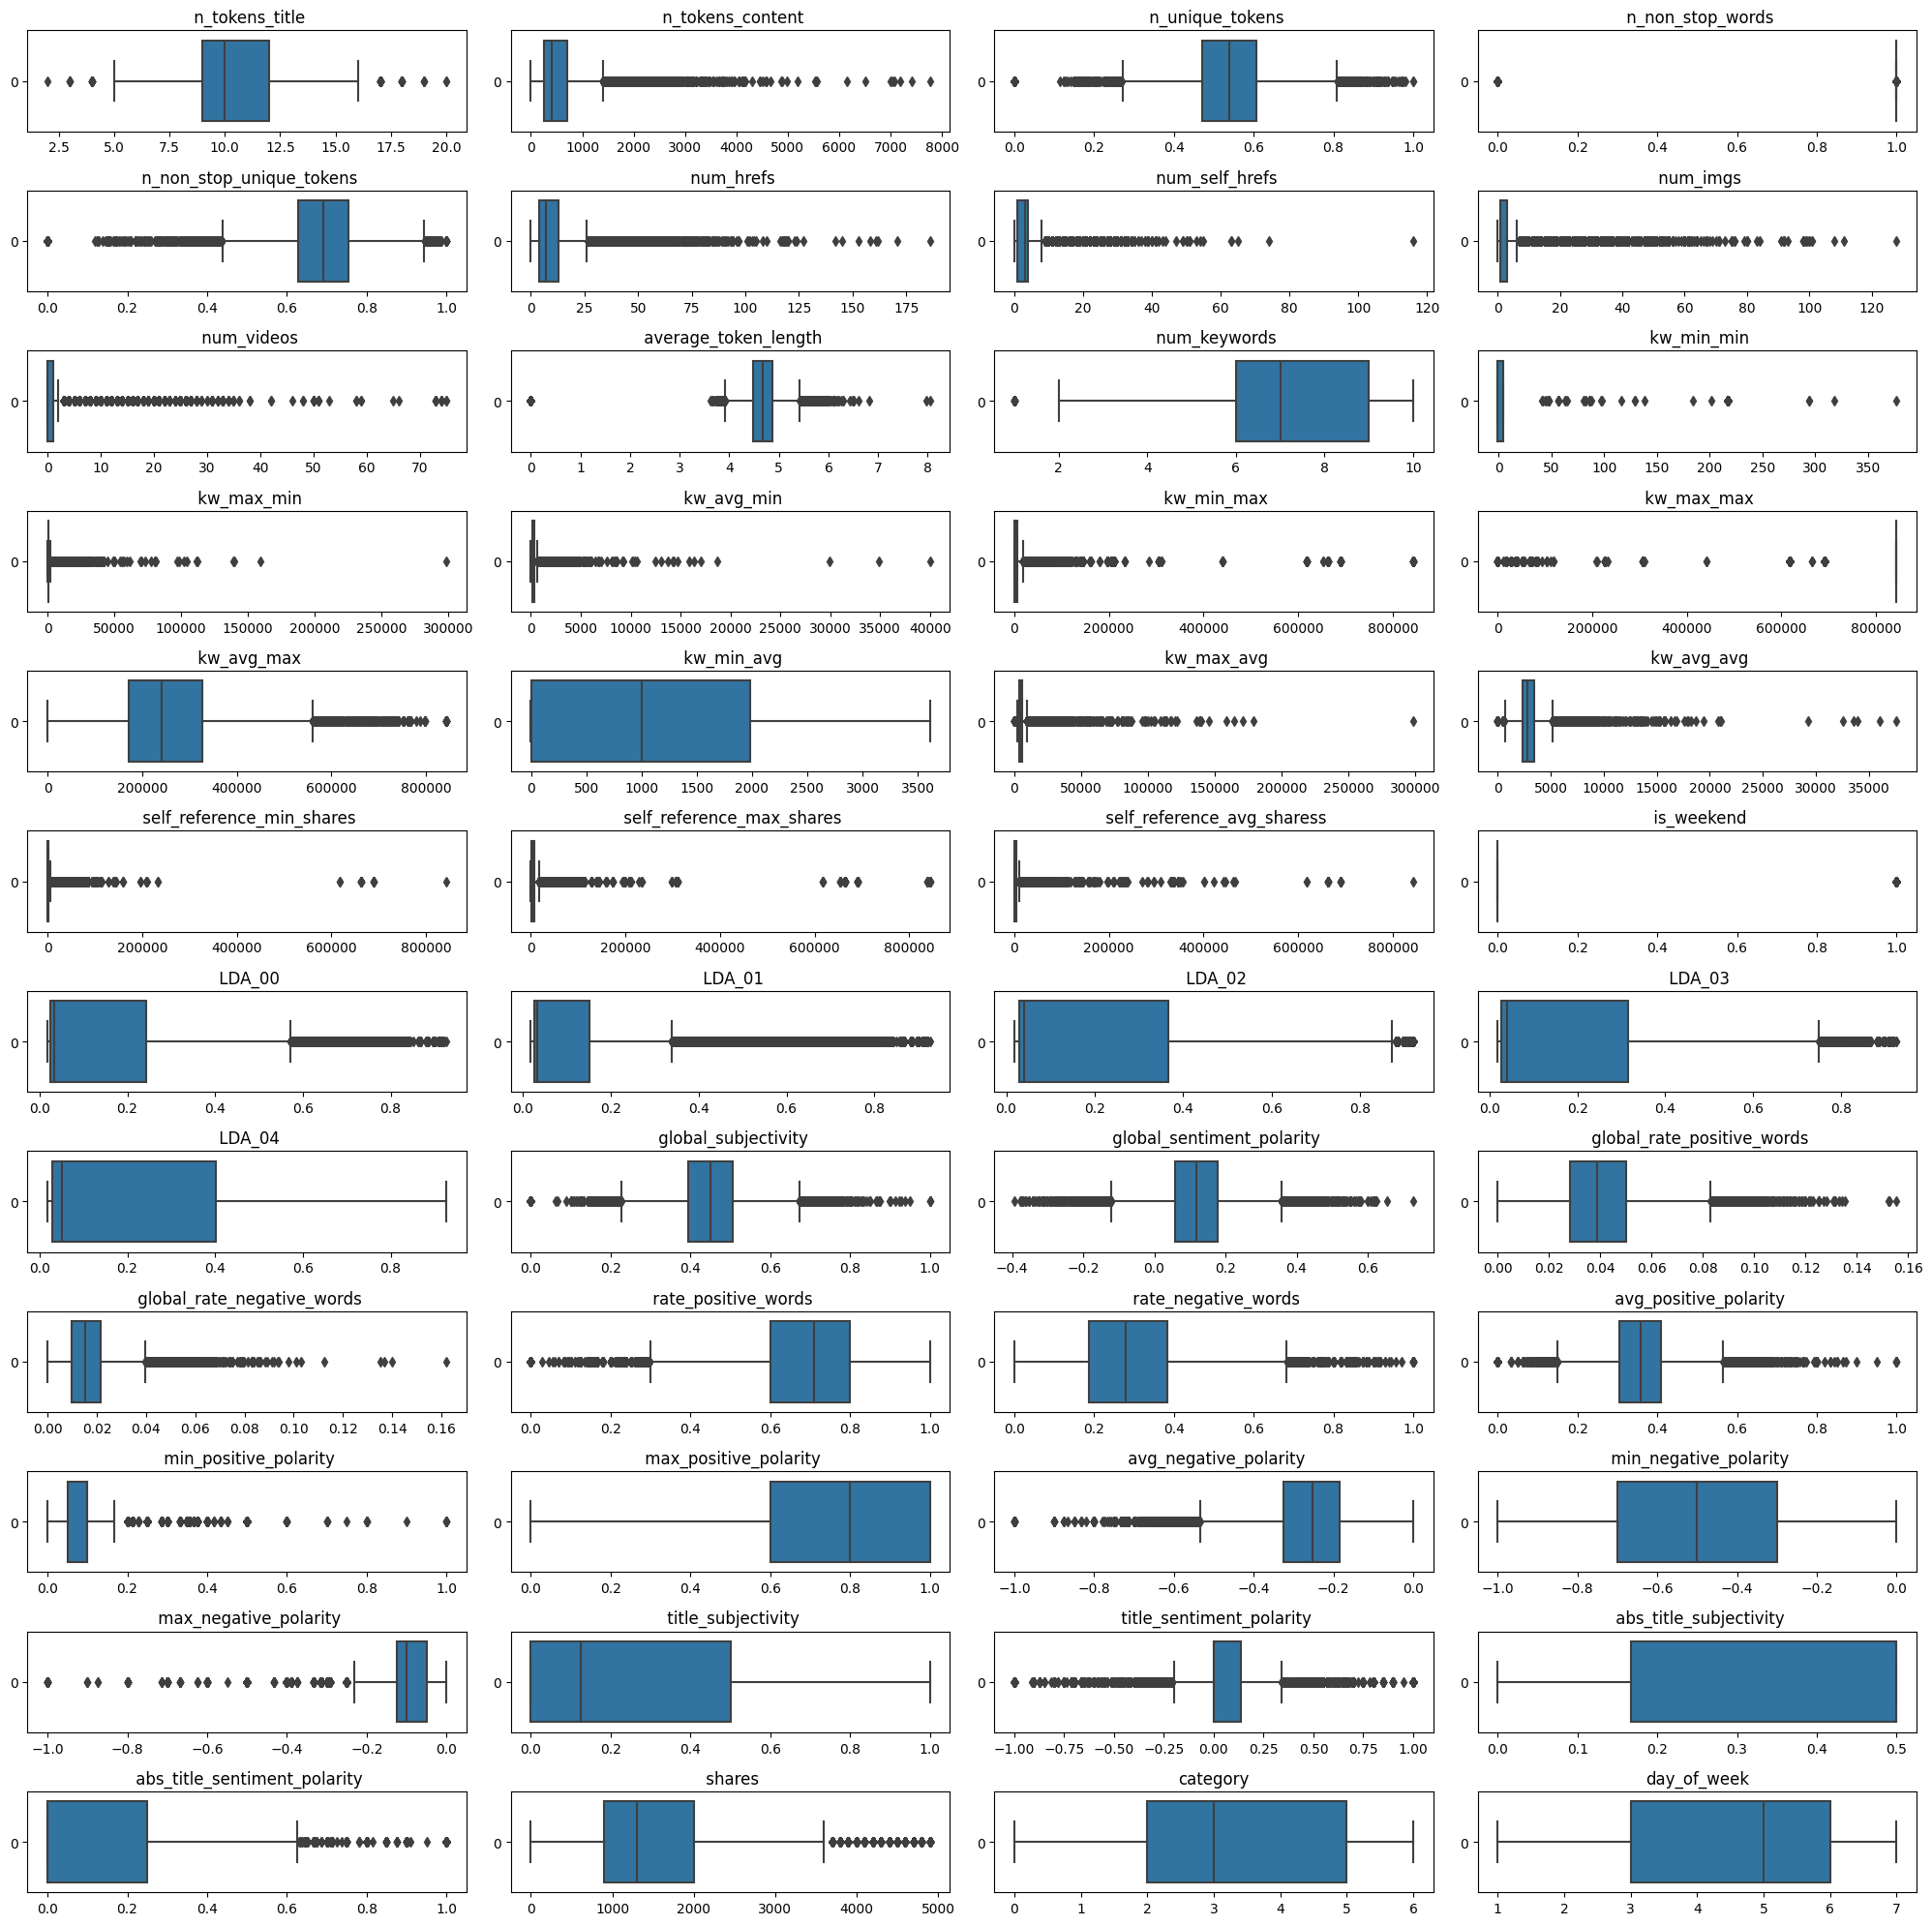

In [17]:
num_cols = data.select_dtypes(['int64', 'float64']).columns

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(12, 4, figsize=(20, 20))

# Plot each numeric column
for i, col in enumerate(num_cols):
    row, col_num = divmod(i, 4)
    sns.boxplot(data[col], ax=axes[row, col_num],orient='h')
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

In [35]:
correlations = df.corr()[' shares'].sort_values(ascending=False)

# Display the sorted correlations
print(correlations)

 shares                          1.000000
 kw_avg_avg                      0.110413
 LDA_03                          0.083771
 kw_max_avg                      0.064306
 self_reference_avg_sharess      0.057789
 self_reference_min_shares       0.055958
 self_reference_max_shares       0.047115
 num_hrefs                       0.045404
 kw_avg_max                      0.044686
 kw_min_avg                      0.039551
 num_imgs                        0.039388
 global_subjectivity             0.031604
 kw_avg_min                      0.030406
 kw_max_min                      0.030114
 abs_title_sentiment_polarity    0.027135
 num_videos                      0.023936
 title_subjectivity              0.021967
 num_keywords                    0.021818
 title_sentiment_polarity        0.012772
 avg_positive_polarity           0.012142
 max_positive_polarity           0.010068
 n_tokens_title                  0.008783
 kw_max_max                      0.007863
 global_rate_negative_words      0

In [18]:
correlations = data.corr()[' shares'].sort_values(ascending=False)

# Display the sorted correlations
print(correlations)

 shares                          1.000000
 is_weekend                      0.144122
 kw_avg_avg                      0.140012
 LDA_04                          0.090965
 kw_min_avg                      0.087192
 LDA_00                          0.076620
 num_hrefs                       0.074608
 global_sentiment_polarity       0.066829
 global_rate_positive_words      0.064567
 num_keywords                    0.062873
 self_reference_avg_sharess      0.059181
 self_reference_max_shares       0.058716
 global_subjectivity             0.058659
 kw_max_avg                      0.057271
 num_imgs                        0.051949
 rate_positive_words             0.048172
 title_sentiment_polarity        0.045405
 kw_min_min                      0.044919
 self_reference_min_shares       0.044818
 num_self_hrefs                  0.043050
 n_tokens_content                0.042715
 max_positive_polarity           0.034972
 LDA_03                          0.033318
 abs_title_sentiment_polarity    0

In [19]:
X=data.drop([' shares'],axis=1)
y=data[' shares']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
X_train = pd.DataFrame(X_scaled[:int(0.8 * len(X_scaled))])
X_test = pd.DataFrame(X_scaled[int(0.8 * len(X_scaled)):])
y_train = y[:int(0.8 * len(y))]
y_test = y[int(0.8 * len(y)):]

selected_features = []
remaining_features = list(range(X_train.shape[1]))
best_score = -np.inf  
feature_names = X.columns

# Forward selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select the current feature to add
        features_to_try = selected_features + [feature]
        X_train_subset = X_train.iloc[:, features_to_try]
        
        # Evaluate the performance using cross-validation
        LR = LinearRegression()
        cv_scores = cross_val_score(LR, X_train_subset, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = np.mean(cv_scores)
        scores.append((mean_score, feature))
    
    # Find the best feature to add
    scores.sort(reverse=True, key=lambda x: x[0])
    best_new_score, best_new_feature = scores[0]
    
    # If the new score is better, update the selected features and best score
    if best_new_score > best_score:
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_score = best_new_score
        print(f"Selected feature: {feature_names[best_new_feature]}, Cross-validated score: {best_new_score:.4f}")
    else:
        break

# Train the final model on the selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
final_LR = LinearRegression()
final_LR.fit(X_train_selected, y_train)

# Evaluate on the test set
test_score = final_LR.score(X_test_selected, y_test)

print(f"Final selected features: {[feature_names[i] for i in selected_features]}")
print(f"Test set R^2 score: {test_score:.4f}")
pred=final_LR.predict(X_test_selected)
print(r2_score(y_test,pred))
print(mse(y_test,pred))


Selected feature:  is_weekend, Cross-validated score: -998053.2341
Selected feature:  LDA_02, Cross-validated score: -984638.5771
Selected feature:  LDA_01, Cross-validated score: -973277.2765
Selected feature:  kw_avg_avg, Cross-validated score: -966199.4376
Selected feature:  LDA_03, Cross-validated score: -960058.4059
Selected feature:  kw_max_avg, Cross-validated score: -955842.0706
Selected feature:  kw_avg_max, Cross-validated score: -946261.1736
Selected feature:  self_reference_avg_sharess, Cross-validated score: -944442.3791
Selected feature:  n_tokens_content, Cross-validated score: -942602.9826
Selected feature:  min_positive_polarity, Cross-validated score: -941979.4200
Selected feature:  global_subjectivity, Cross-validated score: -941198.5271
Selected feature:  n_non_stop_unique_tokens, Cross-validated score: -940267.7316
Selected feature: day_of_week, Cross-validated score: -940049.5014
Selected feature:  title_sentiment_polarity, Cross-validated score: -939832.5483
Sele

In [26]:
final_df = data[[' is_weekend', ' LDA_02', ' LDA_01', ' kw_avg_avg', ' LDA_03', ' kw_max_avg', ' kw_avg_max', ' self_reference_avg_sharess', ' n_tokens_content', ' min_positive_polarity', ' global_subjectivity', ' n_non_stop_unique_tokens', 'day_of_week', ' title_sentiment_polarity', ' LDA_04', ' max_positive_polarity', ' abs_title_subjectivity', 'category', ' title_subjectivity',' shares']]

In [27]:
final_df.shape

(34464, 20)

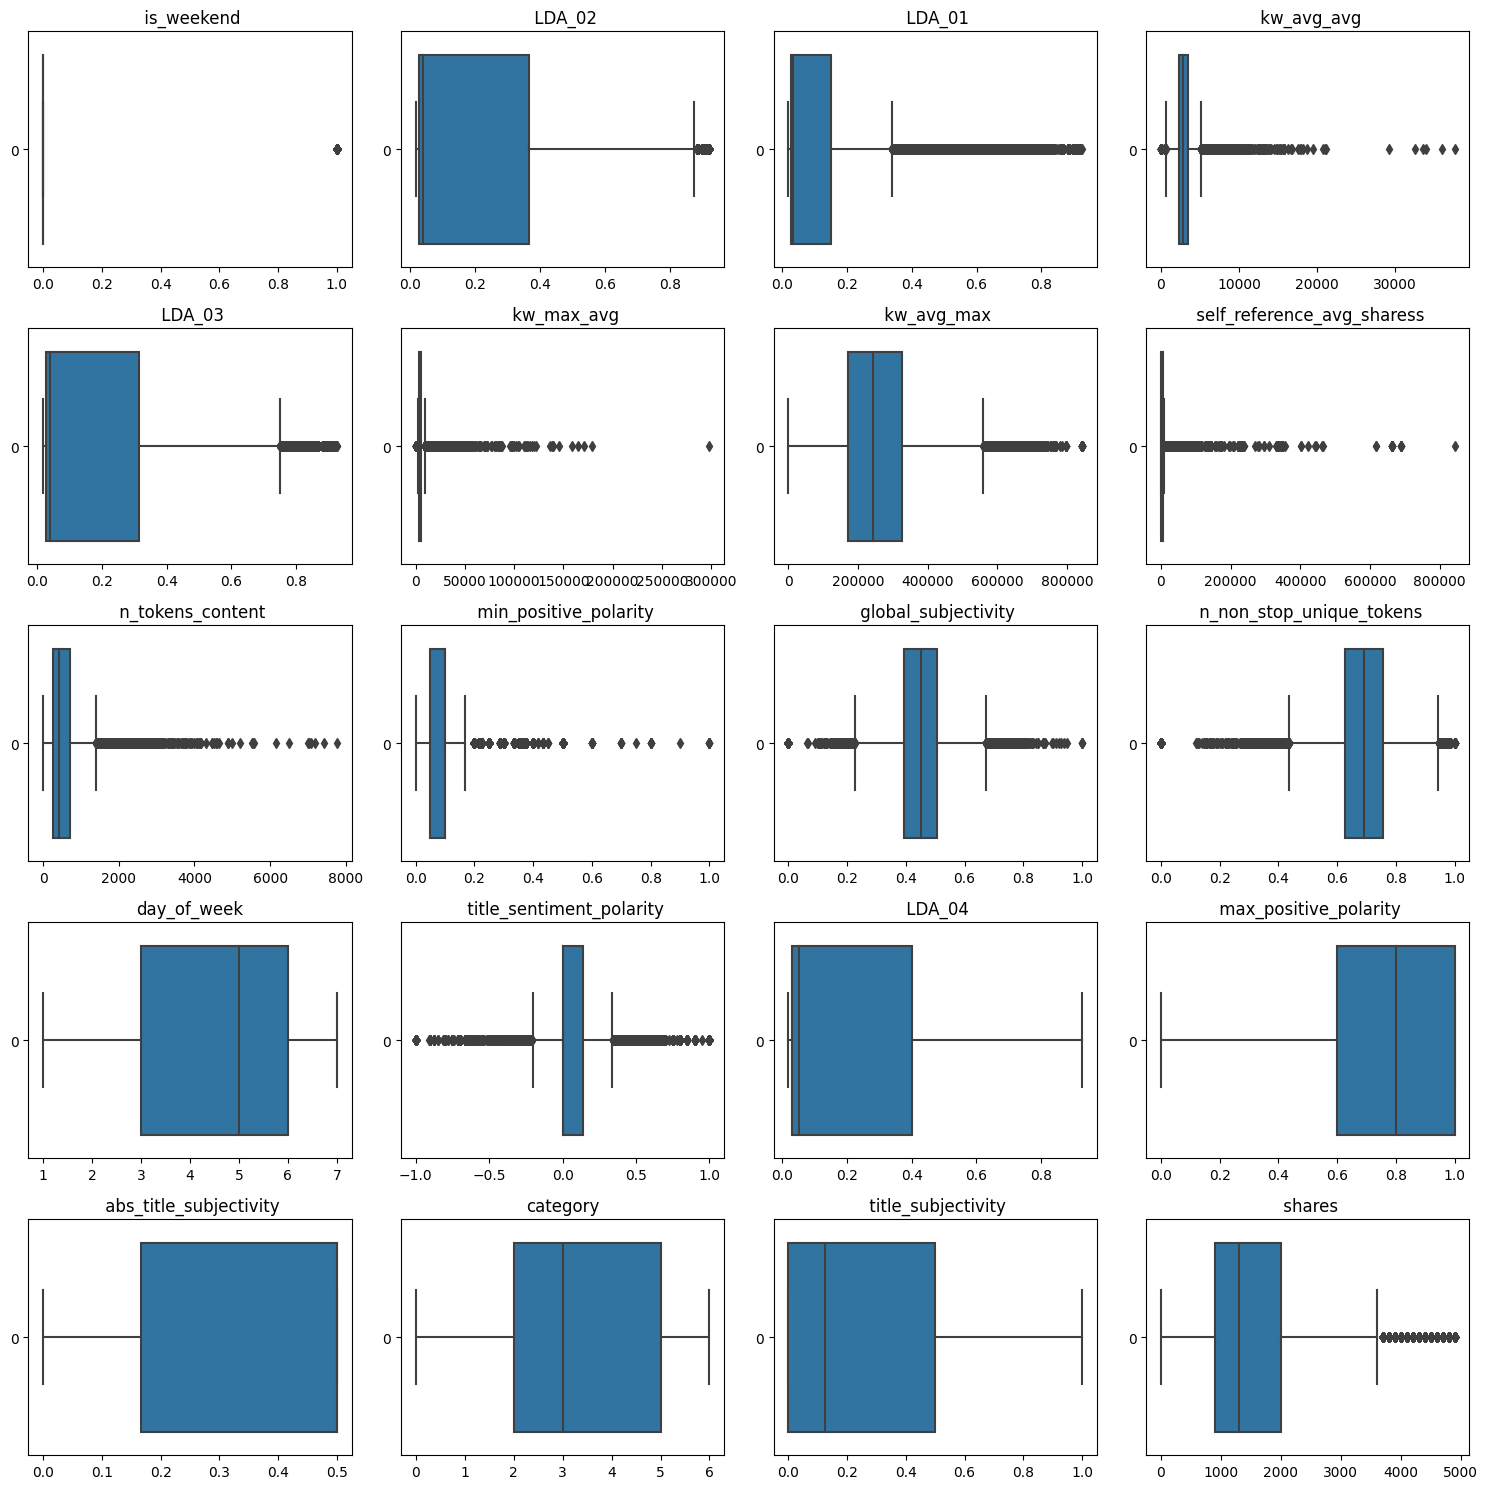

In [28]:
num_cols = final_df.select_dtypes(['int64', 'float64']).columns

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(5, 4, figsize=(15, 15))

# Plot each numeric column
for i, col in enumerate(num_cols):
    row, col_num = divmod(i, 4)
    sns.boxplot(final_df[col], ax=axes[row, col_num],orient='h')
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

In [29]:
correlations = final_df.corr()[' shares'].sort_values(ascending=False)

# Display the sorted correlations
print(correlations)

 shares                        1.000000
 is_weekend                    0.144122
 kw_avg_avg                    0.140012
 LDA_04                        0.090965
 self_reference_avg_sharess    0.059181
 global_subjectivity           0.058659
 kw_max_avg                    0.057271
 title_sentiment_polarity      0.045405
 n_tokens_content              0.042715
 max_positive_polarity         0.034972
 LDA_03                        0.033318
 title_subjectivity            0.024704
 kw_avg_max                    0.013398
 abs_title_subjectivity        0.002375
 min_positive_polarity        -0.033173
 n_non_stop_unique_tokens     -0.048402
category                      -0.053048
 LDA_01                       -0.076599
day_of_week                   -0.079026
 LDA_02                       -0.135156
Name:  shares, dtype: float64


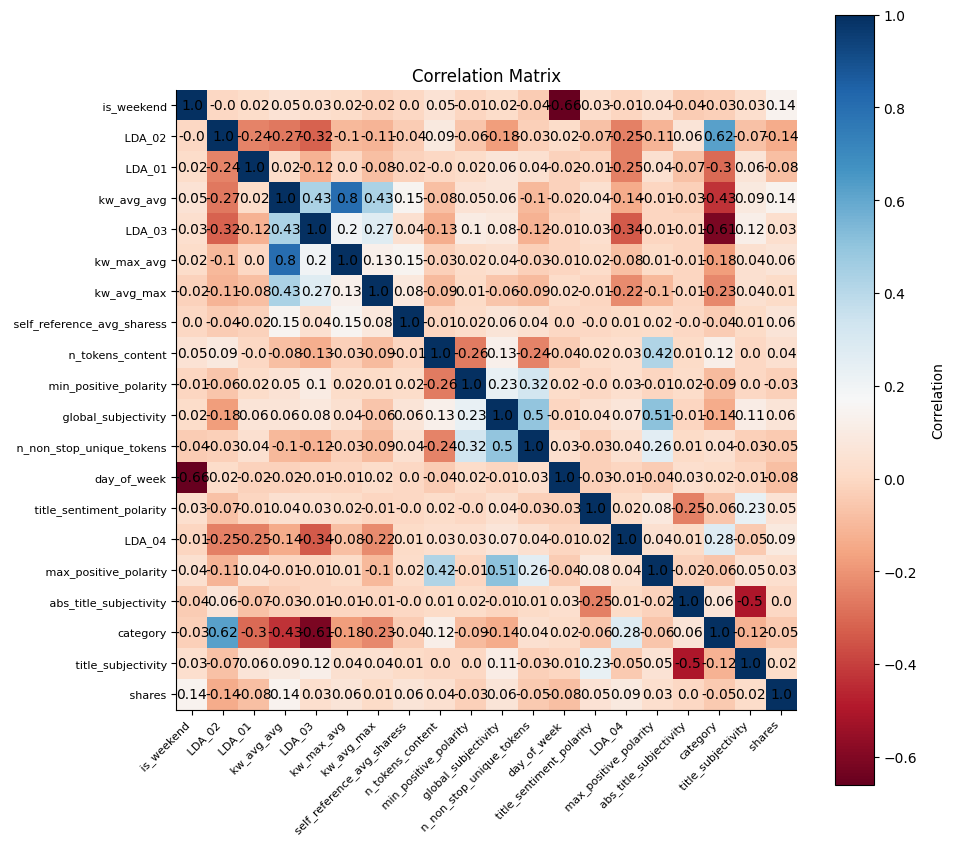

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
corr_matrix = final_df.corr().round(2)

heatmap = ax.imshow(corr_matrix, cmap='RdBu')


ticks = np.arange(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(corr_matrix.columns, fontsize=8)

cbar = plt.colorbar(heatmap)
cbar.set_label('Correlation', rotation=90, labelpad=10)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, str(corr_matrix.iloc[i, j]), ha='center', va='center', color='black')
ax.set_title('Correlation Matrix')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [31]:
final_df = final_df[final_df[' LDA_01']<0.5]
final_df = final_df[final_df[' LDA_01']<0.8]
final_df = final_df[final_df[' kw_max_avg']<30000]
final_df = final_df[final_df[' kw_avg_max']<600000]
final_df = final_df[final_df[' self_reference_avg_sharess']<20000]
final_df = final_df[final_df[' n_tokens_content']<3000]

In [32]:
final_df.shape

(28821, 20)

In [33]:
X=final_df.drop([' shares'],axis=1)
y=final_df[' shares']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [34]:
X_train = pd.DataFrame(X_scaled[:int(0.8 * len(X_scaled))])
X_test = pd.DataFrame(X_scaled[int(0.8 * len(X_scaled)):])
y_train = y[:int(0.8 * len(y))]
y_test = y[int(0.8 * len(y)):]

selected_features = []
remaining_features = list(range(X_train.shape[1]))
best_score = -np.inf  
feature_names = X.columns

# Forward selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select the current feature to add
        features_to_try = selected_features + [feature]
        X_train_subset = X_train.iloc[:, features_to_try]
        
        # Evaluate the performance using cross-validation
        LR = LinearRegression()
        cv_scores = cross_val_score(LR, X_train_subset, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = np.mean(cv_scores)
        scores.append((mean_score, feature))
    
    # Find the best feature to add
    scores.sort(reverse=True, key=lambda x: x[0])
    best_new_score, best_new_feature = scores[0]
    
    # If the new score is better, update the selected features and best score
    if best_new_score > best_score:
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_score = best_new_score
        print(f"Selected feature: {feature_names[best_new_feature]}, Cross-validated score: {best_new_score:.4f}")
    else:
        break

# Train the final model on the selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
final_LR = LinearRegression()
final_LR.fit(X_train_selected, y_train)

# Evaluate on the test set
test_score = final_LR.score(X_test_selected, y_test)

print(f"Final selected features: {[feature_names[i] for i in selected_features]}")
print(f"Test set R^2 score: {test_score:.4f}")
pred=final_LR.predict(X_test_selected)
print(r2_score(y_test,pred))
print(mse(y_test,pred))

Selected feature:  is_weekend, Cross-validated score: -983139.8467
Selected feature:  LDA_02, Cross-validated score: -965326.5743
Selected feature:  self_reference_avg_sharess, Cross-validated score: -954661.1441
Selected feature:  kw_avg_avg, Cross-validated score: -949389.1208
Selected feature:  LDA_03, Cross-validated score: -941230.6759
Selected feature:  kw_avg_max, Cross-validated score: -934134.0942
Selected feature:  kw_max_avg, Cross-validated score: -930077.7968
Selected feature:  LDA_01, Cross-validated score: -926809.4484
Selected feature:  n_non_stop_unique_tokens, Cross-validated score: -924895.3621
Selected feature:  global_subjectivity, Cross-validated score: -923687.8625
Selected feature:  min_positive_polarity, Cross-validated score: -922628.8295
Selected feature:  LDA_04, Cross-validated score: -922106.7653
Selected feature:  title_sentiment_polarity, Cross-validated score: -921854.2288
Selected feature:  max_positive_polarity, Cross-validated score: -921683.6229
Sel

In [20]:
X_train = pd.DataFrame(X_scaled[:int(0.8 * len(X_scaled))])
X_test = pd.DataFrame(X_scaled[int(0.8 * len(X_scaled)):])
y_train = y[:int(0.8 * len(y))]
y_test = y[int(0.8 * len(y)):]

selected_features = []
remaining_features = list(range(X_train.shape[1]))
best_score = -np.inf  
feature_names = X.columns

# Forward selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select the current feature to add
        features_to_try = selected_features + [feature]
        X_train_subset = X_train.iloc[:, features_to_try]
        
        # Evaluate the performance using cross-validation
        ridge = Ridge(alpha=0.1)
        cv_scores = cross_val_score(ridge, X_train_subset, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = np.mean(cv_scores)
        scores.append((mean_score, feature))
    
    # Find the best feature to add
    scores.sort(reverse=True, key=lambda x: x[0])
    best_new_score, best_new_feature = scores[0]
    
    # If the new score is better, update the selected features and best score
    if best_new_score > best_score:
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_score = best_new_score
        print(f"Selected feature: {feature_names[best_new_feature]}, Cross-validated score: {best_new_score:.4f}")
    else:
        break

# Train the final model on the selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
final_ridge = Ridge(alpha=0.1)
final_ridge.fit(X_train_selected, y_train)

# Evaluate on the test set
test_score = final_ridge.score(X_test_selected, y_test)

print(f"Final selected features: {[feature_names[i] for i in selected_features]}")
print(f"Test set R^2 score: {test_score:.4f}")
pred=final_ridge.predict(X_test_selected)
print(r2_score(y_test,pred))
print(mse(y_test,pred))


Selected feature:  kw_avg_avg, Cross-validated score: -150912213.6977
Selected feature:  LDA_03, Cross-validated score: -150655628.3000
Selected feature:  num_hrefs, Cross-validated score: -150526212.2340
Selected feature:  LDA_02, Cross-validated score: -150449755.3132
Selected feature:  self_reference_max_shares, Cross-validated score: -150377629.2762
Selected feature:  kw_max_avg, Cross-validated score: -150312866.1815
Selected feature:  kw_min_avg, Cross-validated score: -150200751.3869
Selected feature:  kw_min_min, Cross-validated score: -150050159.6606
Selected feature:  avg_negative_polarity, Cross-validated score: -149993313.9877
Selected feature:  LDA_01, Cross-validated score: -149952128.3276
Selected feature: day_of_week, Cross-validated score: -149926155.8224
Selected feature:  num_self_hrefs, Cross-validated score: -149903020.0198
Selected feature:  kw_min_max, Cross-validated score: -149879920.3840
Selected feature:  abs_title_sentiment_polarity, Cross-validated score: -

In [15]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
X_train = pd.DataFrame(X_scaled[:int(0.8 * len(X_scaled))])
X_test = pd.DataFrame(X_scaled[int(0.8 * len(X_scaled)):])
y_train = y[:int(0.8 * len(y))]
y_test = y[int(0.8 * len(y)):]

selected_features = []
remaining_features = list(range(X_train.shape[1]))
best_score = -np.inf  
feature_names = X.columns

# Forward selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select the current feature to add
        features_to_try = selected_features + [feature]
        X_train_subset = X_train.iloc[:, features_to_try]
        
        # Evaluate the performance using cross-validation
        reg = DecisionTreeRegressor(max_depth= 3, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)
        cv_scores = cross_val_score(reg, X_train_subset, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = np.mean(cv_scores)
        scores.append((mean_score, feature))
    
    # Find the best feature to add
    scores.sort(reverse=True, key=lambda x: x[0])
    best_new_score, best_new_feature = scores[0]
    
    # If the new score is better, update the selected features and best score
    if best_new_score > best_score:
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_score = best_new_score
        print(f"Selected feature: {feature_names[best_new_feature]}, Cross-validated score: {best_new_score:.4f}")
    else:
        break

# Train the final model on the selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
final_reg = DecisionTreeRegressor(max_depth= 3, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)
final_reg.fit(X_train_selected, y_train)

# Evaluate on the test set
test_score = final_reg.score(X_test_selected, y_test)

print(f"Final selected features: {[feature_names[i] for i in selected_features]}")
print(f"Test set R^2 score: {test_score:.4f}")
pred=final_reg.predict(X_test_selected)
print(r2_score(y_test,pred))
print(mse(y_test,pred))


In [24]:




# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first applies PCA, then fits a Decision Tree
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing the data before PCA
    ('pca', PCA(n_components=0.5,svd_solver='full')),  # Reduce to 2 principal components
    ('dt', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
pred=pipeline.predict(X_test)
print(r2_score(y_test,pred))
print(mse(y_test,pred))

0.018999816276960346
118379091.86604448


In [25]:
df.shape

(39644, 48)

In [37]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Select the top 20 features
X_rfe = rfe.fit_transform(X, y)

In [38]:
X_rfe.shape

(39644, 10)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

In [40]:
LR=LinearRegression()
LR.fit(X_train,y_train)



prediction=LR.predict(X_test)
print(r2_score(y_test,prediction))
print(mse(y_test,prediction))

0.008305112052474972
119669641.44480783


<AxesSubplot: >

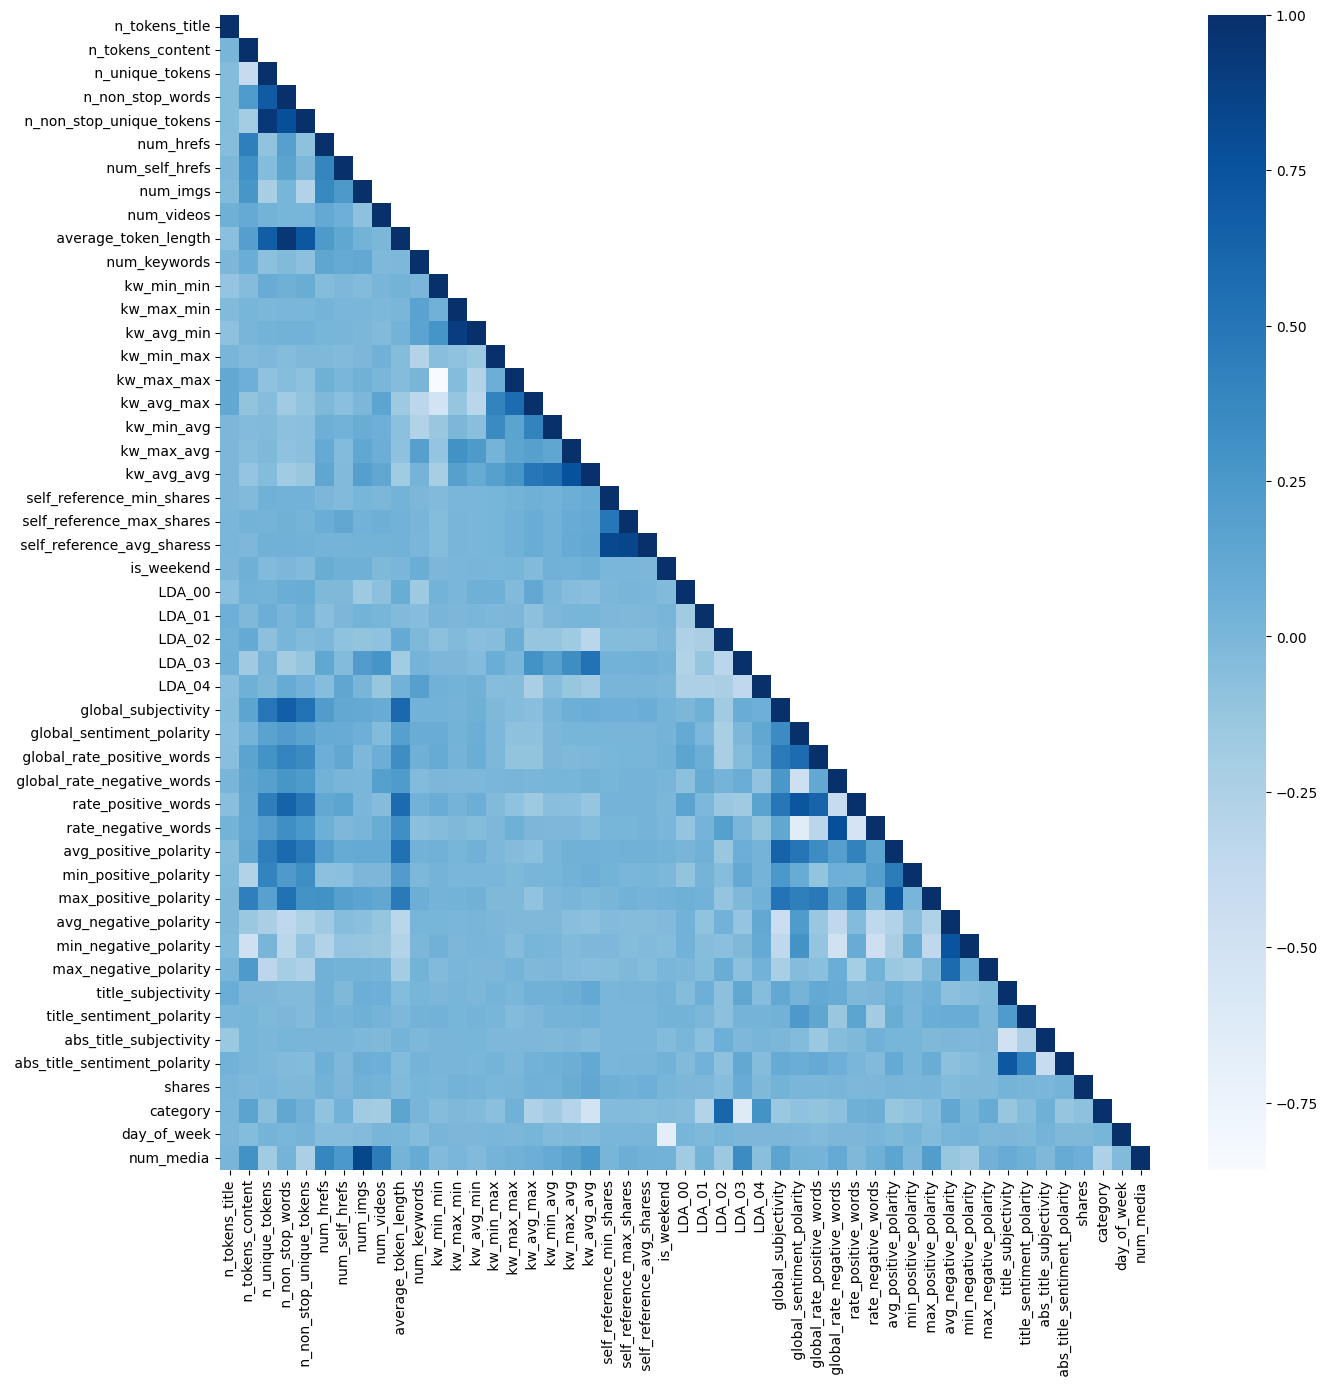

In [64]:
cor=data.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
data_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(data_lt,cmap='Blues')